In [ ]:
# https://rp5.ru/%D0%90%D1%80%D1%85%D0%B8%D0%B2_%D0%BF%D0%BE%D0%B3%D0%BE%D0%B4%D1%8B_%D0%B2_%D0%A8%D0%B5%D1%80%D0%B5%D0%BC%D0%B5%D1%82%D1%8C%D0%B5%D0%B2%D0%BE,_%D0%B8%D0%BC._%D0%90._%D0%A1._%D0%9F%D1%83%D1%88%D0%BA%D0%B8%D0%BD%D0%B0_(%D0%B0%D1%8D%D1%80%D0%BE%D0%BF%D0%BE%D1%80%D1%82)

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
os.listdir()

['.ipynb_checkpoints',
 'Untitled.ipynb',
 'Вэллингтон.xls',
 'Вэллингтон.xls.gz',
 'Мск_5лет.xls',
 'Мск_5лет.xls.gz',
 'НиНо_5лет.gz',
 'НиНо_5лет.xls',
 'Новосиб.xls',
 'Новосиб.xls.gz',
 'Погода 1.ipynb',
 'СПб_5лет.gz',
 'СПб_5лет.xls']

In [8]:
data_msk['Местное время в Москве (ВДНХ)']

0        01.01.2020 21:00
1        01.01.2020 18:00
2        01.01.2020 15:00
3        01.01.2020 12:00
4        01.01.2020 09:00
               ...       
17642    01.01.2015 04:00
17643    01.01.2015 03:00
17644    01.01.2015 02:00
17645    01.01.2015 01:00
17646    01.01.2015 00:00
Name: Местное время в Москве (ВДНХ), Length: 17647, dtype: object

In [63]:
data_msk = pd.read_excel('Мск_5лет.xls', skiprows=6)
data_msk = data_msk.rename(columns={'Местное время в Москве (ВДНХ)': 'Time'})
data_msk.index = pd.to_datetime(data_msk['Time'], format='%d.%m.%Y %H:%M')

data_spb = pd.read_excel('СПб_5лет.xls', skiprows=6)
data_spb = data_spb.rename(columns={'Местное время в Санкт-Петербурге': 'Time'})
data_spb.index = pd.to_datetime(data_spb['Time'], format='%d.%m.%Y %H:%M')

data_vell = pd.read_excel('Вэллингтон.xls', skiprows=6)
data_vell = data_vell.rename(columns={'Местное время в Веллингтоне (аэропорт)': 'Time'})
data_vell.index = pd.to_datetime(data_vell['Time'], format='%d.%m.%Y %H:%M')

In [73]:
data

23.3

In [ ]:
'это строка' "Это тоже"

In [75]:
print('bes\t')

bes	


In [66]:
all_data = pd.DataFrame()
all_data['Moscow'] = data_msk['T']
all_data['S. Petersburg'] = data_spb['T']
all_data['Vellington'] = data_vell['T']

In [68]:
all_data.corr()

,Moscow,S. Petersburg,Vellington
Moscow,1.000000,0.916477,-0.559160
S. Petersburg,0.916477,1.000000,-0.583254
Vellington,-0.559160,-0.583254,1.000000


<Figure size 1080x720 with 0 Axes>

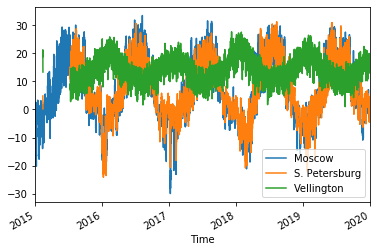

In [72]:
plt.figure(figsize=(15, 10))
all_data.plot()

In [49]:
len(data_msk), len(data_spb), len(data_vell)

(17647, 14607, 14489)

In [50]:
data_msk = data_msk[data_msk.index.hour == 12]
data_novosib = data_novosib[data_novosib.index.hour == 13]
data_spb = data_spb[data_spb.index.hour == 12]
data_vell = data_vell[data_vell.index.hour==12]

In [51]:
len(data_vell), len(data_msk), len(data_spb)

(1808, 1826, 1826)

In [53]:
set(data_msk.index) - set(data_vell.index)

{Timestamp('2015-05-20 12:00:00'),
 Timestamp('2015-05-21 12:00:00'),
 Timestamp('2015-05-22 12:00:00'),
 Timestamp('2015-05-23 12:00:00'),
 Timestamp('2015-05-24 12:00:00'),
 Timestamp('2015-05-25 12:00:00'),
 Timestamp('2015-05-26 12:00:00'),
 Timestamp('2015-05-27 12:00:00'),
 Timestamp('2015-07-23 12:00:00'),
 Timestamp('2017-08-04 12:00:00'),
 Timestamp('2017-10-11 12:00:00'),
 Timestamp('2017-10-12 12:00:00'),
 Timestamp('2018-04-22 12:00:00'),
 Timestamp('2018-07-13 12:00:00'),
 Timestamp('2019-02-16 12:00:00'),
 Timestamp('2019-02-17 12:00:00'),
 Timestamp('2019-02-18 12:00:00'),
 Timestamp('2019-07-01 12:00:00'),
 Timestamp('2019-07-25 12:00:00')}

In [47]:
data_spb.index.hour

Int64Index([12, 12, 12, 12, 12, 12, 12, 12, 12, 12,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='Местное время в Санкт-Петербурге', length=1826)

In [ ]:
data = pd.read_excel('ar2.xls', skiprows=6)
data = data.set_index('Местное время в Москве (центр, Балчуг)')
plt.figure(figsize=(10, 8))
data['sss'].fillna(0).unique()

In [ ]:
data.loc[data['sss'] == 'Менее 0.5', 'sss'] = 0
data.loc[data['sss'] == 'Снежный покров не постоянный.', 'sss'] = 0

In [ ]:
data['sss'].fillna(0).unique()

In [ ]:
data[~data['sss'].isna()]

In [ ]:
data['sss'].plot()
plt.xticks(rotation=45) 

In [ ]:
data[data['T'].isna()]

In [ ]:
data['T'].mean(), data['T'].max(), data['T'].min()

In [ ]:
plt.plot(data.index[::100], data['VV'][::100])

In [ ]:
data[['T', 'VV']].corr()

In [ ]:
data.columns

In [ ]:
data.describe

In [77]:
import time
time.time.now()

AttributeError: 'builtin_function_or_method' object has no attribute 'now'